In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits

<h1>Is this $\tau=1$ or $\tau=0.1$?</h1>

In [2]:
cube1 = fits.open("0_lwsynth_525.0.fits")[0].data

In [3]:
cube2 = fits.open("150_lwsynth_525.0.fits")[0].data

In [4]:
import pyflct

In [5]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 1200.0 / 1.665 / pixelsize

In [6]:
image1 = cube1[:,:,0,40]
image2 = cube2[:,:,0,40]

In [7]:
vel_x40, vel_y40, vm40 = pyflct.flct(image1, image2, delta_t, pixelsize, sigma, quiet = True)

In [8]:
Vx = fits.open("Velocities_TAU_0_1.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_0_1.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [9]:
# 2x2 Binning of Velocities
Vx_1 = Vx[0]
Vx_2 = Vx[1]

Vy_1 = Vy[0]
Vy_2 = Vy[1]

Vx_1 = Vx_1.reshape(768, 2, 768, 2)
Vx_2 = Vx_2.reshape(768, 2, 768, 2)
Vy_1 = Vy_1.reshape(768, 2, 768, 2)
Vy_2 = Vy_2.reshape(768, 2, 768, 2)

In [10]:
Vx_bin = (Vx_1 + Vx_2).mean(axis = 3).mean(axis = 1)
Vy_bin = (Vy_1 + Vy_2).mean(axis = 3).mean(axis = 1)

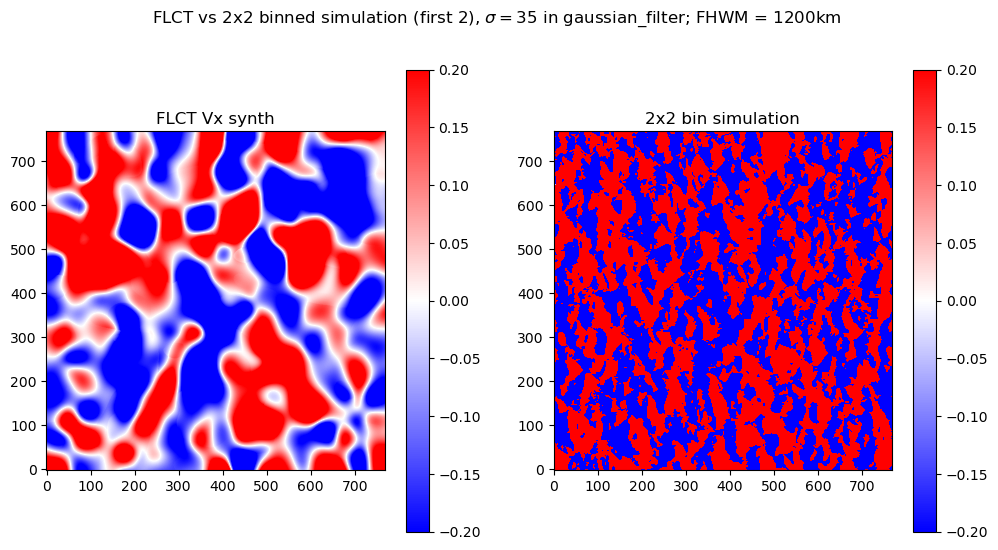

In [11]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation") 
fig.colorbar(im2)

In [12]:
from scipy.ndimage import gaussian_filter

In [13]:
# sigma = 35
Vx_filtered35 = gaussian_filter(Vx_bin, 35, mode = "wrap")
Vy_filtered35 = gaussian_filter(Vy_bin, 35, mode = "wrap")

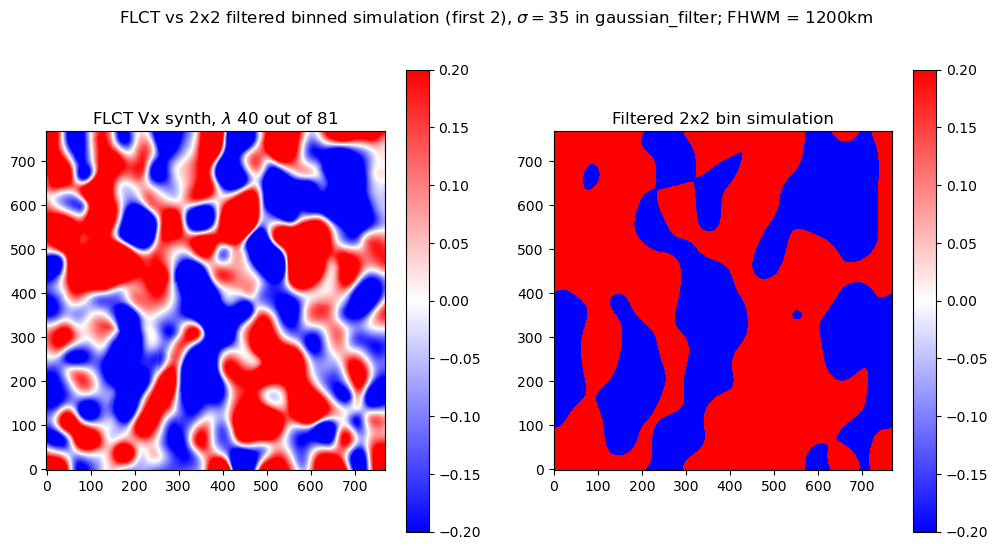

In [14]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation") 
fig.colorbar(im2)
plt.savefig("New40_TAU_0_1Vx.png", dpi = 600)

<h1>THIS IS $\tau=0.1$!!!!!</h1>

<h1 style = "color:yellow">$\tau=1$!</h1>

In [15]:
Vx_TAU1 = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy_TAU1 = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx_TAU1 = Vx_TAU1.transpose(0, 2, 1)
Vy_TAU1 = Vy_TAU1.transpose(0, 2, 1)

In [16]:
# 2x2 Binning of Velocities
Vx_1TAU1 = Vx_TAU1[0]
Vx_2TAU1 = Vx_TAU1[1]

Vy_1TAU1 = Vy_TAU1[0]
Vy_2TAU1 = Vy_TAU1[1]

Vx_1TAU1 = Vx_1TAU1.reshape(768, 2, 768, 2)
Vx_2TAU1 = Vx_2TAU1.reshape(768, 2, 768, 2)
Vy_1TAU1 = Vy_1TAU1.reshape(768, 2, 768, 2)
Vy_2TAU1 = Vy_2TAU1.reshape(768, 2, 768, 2)

In [17]:
Vx_binTAU1 = (Vx_1TAU1 + Vx_2TAU1).mean(axis = 3).mean(axis = 1)
Vy_binTAU1 = (Vy_1TAU1 + Vy_2TAU1).mean(axis = 3).mean(axis = 1)

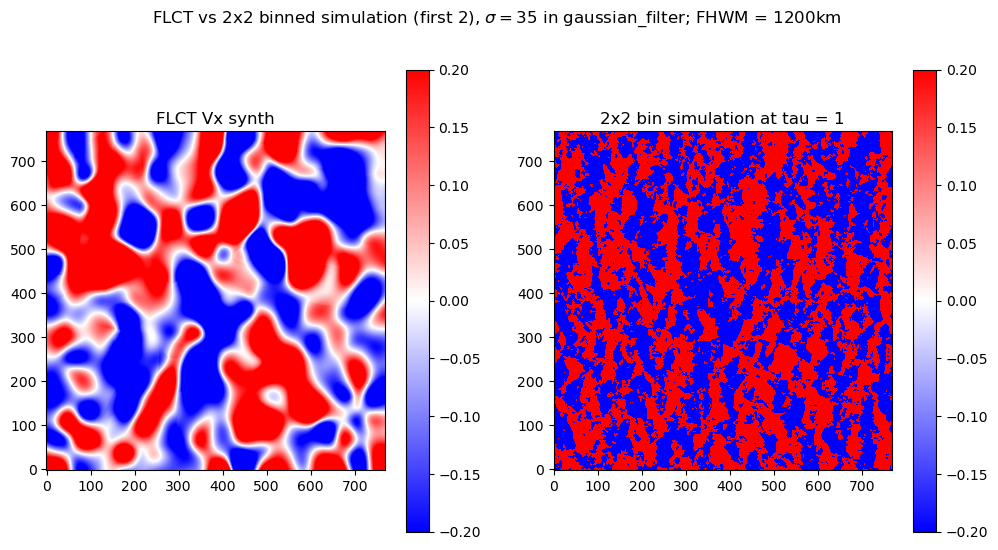

In [18]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_binTAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("2x2 bin simulation at tau = 1") 
fig.colorbar(im2)

In [19]:
# sigma = 35
Vx_filtered35TAU1 = gaussian_filter(Vx_binTAU1, 35, mode = "wrap")
Vy_filtered35TAU1 = gaussian_filter(Vy_binTAU1, 35, mode = "wrap")

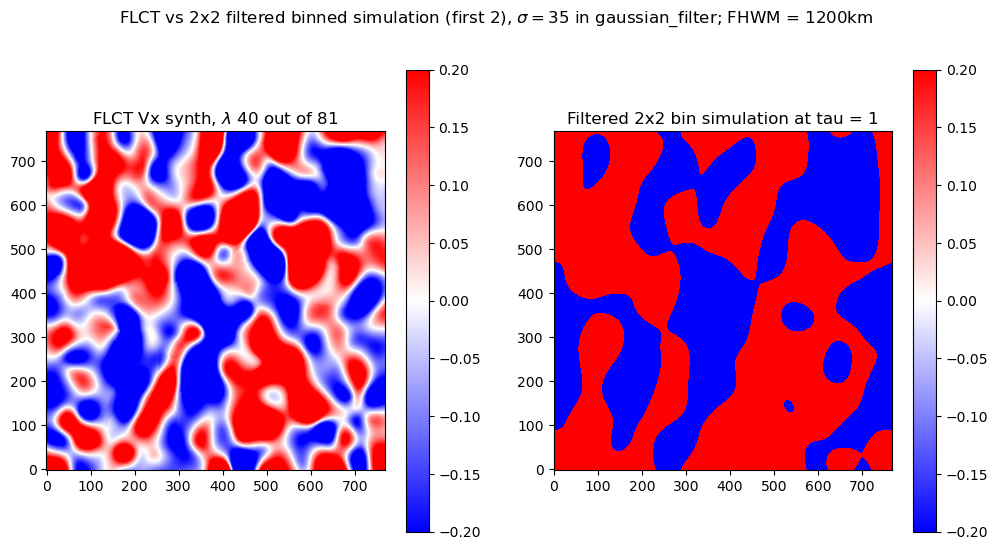

In [20]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x40[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 40 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New40_TAU_1_0Vx.png", dpi = 600)

In [21]:
from scipy.stats import pearsonr

In [22]:
r_x40TAU1 = pearsonr(vel_x40.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x40TAU1)

PearsonRResult(statistic=0.7252834374030187, pvalue=0.0)


In [23]:
r_y40TAU1 = pearsonr(vel_y40.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y40TAU1)

PearsonRResult(statistic=0.6488545626315068, pvalue=0.0)


<h1> Let's see $\tau=1$ vs continuum</h1>

In [24]:
image3 = cube1[:,:,0,0]
image4 = cube2[:,:,0,0]

In [25]:
vel_x0, vel_y0, vm0 = pyflct.flct(image3, image4, delta_t, pixelsize, sigma, quiet = True)

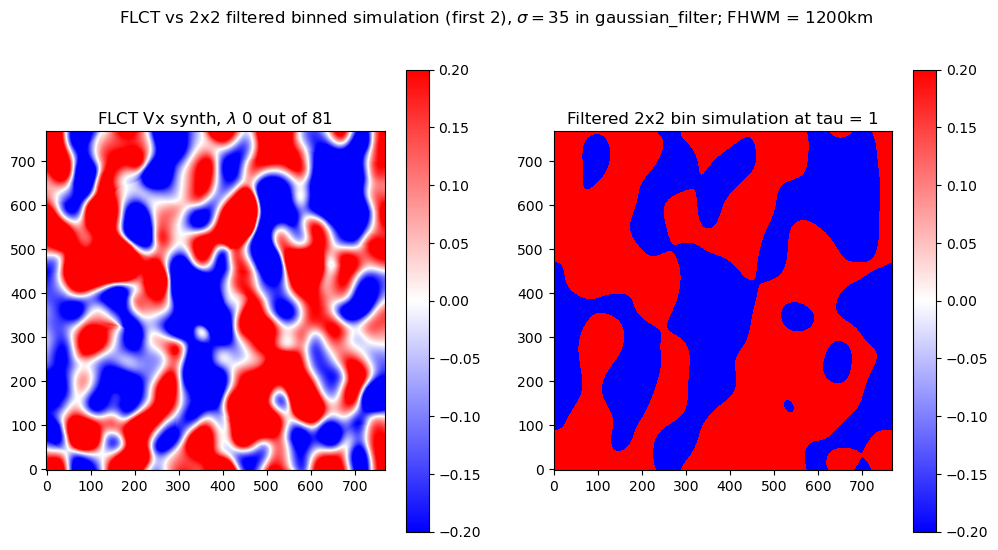

In [26]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 0 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New00_TAU_1_0Vx.png", dpi = 600)

In [27]:
r_x0TAU1 = pearsonr(vel_x0.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x0TAU1)

PearsonRResult(statistic=0.8111617498504096, pvalue=0.0)


In [28]:
r_y0TAU1 = pearsonr(vel_y0.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y0TAU1)

PearsonRResult(statistic=0.7280428137213728, pvalue=0.0)


<h1>Let's see $\tau=1$ vs line</h1>

In [29]:
image5 = cube1[:,:,0,45]
image6 = cube2[:,:,0,45]

In [30]:
vel_x45, vel_y45, vm45 = pyflct.flct(image5, image6, delta_t, pixelsize, sigma, quiet = True)

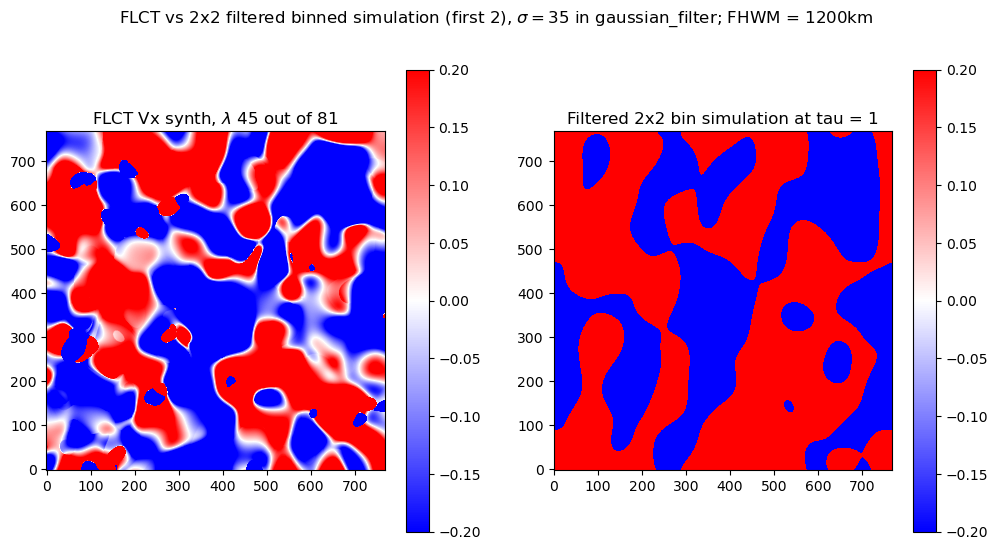

In [31]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x45[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 45 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New45_TAU_1_0Vx.png", dpi = 600)

In [32]:
r_x45TAU1 = pearsonr(vel_x45.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x45TAU1)

PearsonRResult(statistic=0.07194116124656719, pvalue=0.0)


In [33]:
r_y45TAU1 = pearsonr(vel_y45.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y45TAU1)

PearsonRResult(statistic=0.1660091976532814, pvalue=0.0)


In [34]:
image7 = cube1[:,:,0,50]
image8 = cube2[:,:,0,50]

In [35]:
vel_x50, vel_y50, vm50 = pyflct.flct(image7, image8, delta_t, pixelsize, sigma, quiet = True)

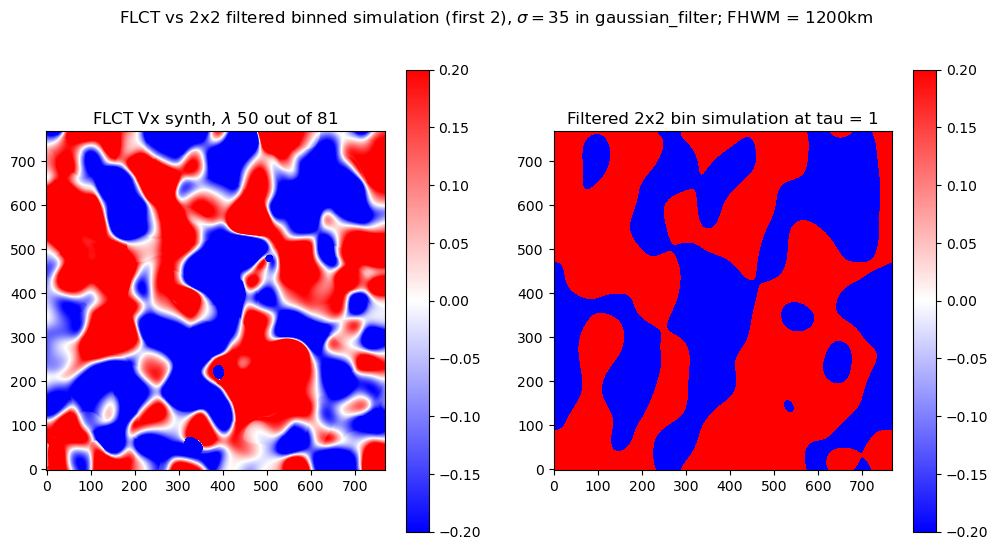

In [36]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT vs 2x2 filtered binned simulation (first 2), $\sigma = 35$ in gaussian_filter; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x50[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth, $\lambda$ 50 out of 81") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_filtered35TAU1[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("Filtered 2x2 bin simulation at tau = 1") 
fig.colorbar(im2)
#plt.savefig("New50_TAU_1_0Vx.png", dpi = 600)

In [37]:
r_x50TAU1 = pearsonr(vel_x50.flatten(), Vx_filtered35TAU1.flatten()) 
print(r_x50TAU1)

PearsonRResult(statistic=0.2704325567298054, pvalue=0.0)


In [38]:
r_y50TAU1 = pearsonr(vel_y50.flatten(), Vy_filtered35TAU1.flatten()) 
print(r_y50TAU1)

PearsonRResult(statistic=0.15462236658933287, pvalue=0.0)


In [39]:
image9 = cube1[:,:,0,0]
image10 = cube2[:,:,0,0]

<h1>Testing FLCT synth vs FLCT based on intensity from simulation - 16. 7. 2024.</h1>

<h2>Continuum (beginning)</h2>

In [40]:
Vx_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[0].data
Vy_1200 = fits.open("pyFLCT_fwhm_1200_dt_30_Inte_tracked.fits")[1].data

In [41]:
# 2x2 Binning of Velocities
Vx_1200_one = Vx_1200[0]
Vx_1200_two = Vx_1200[1]

Vy_1200_one = Vy_1200[0]
Vy_1200_two = Vy_1200[1]

Vx_1200_one = Vx_1200_one.reshape(768, 2, 768, 2)
Vx_1200_two = Vx_1200_two.reshape(768, 2, 768, 2)
Vy_1200_one = Vy_1200_one.reshape(768, 2, 768, 2)
Vy_1200_two = Vy_1200_two.reshape(768, 2, 768, 2)

In [42]:
Vx_1200_bin = (Vx_1200_one + Vx_1200_two).mean(axis = 3).mean(axis = 1)
Vy_1200_bin = (Vy_1200_one + Vy_1200_two).mean(axis = 3).mean(axis = 1)

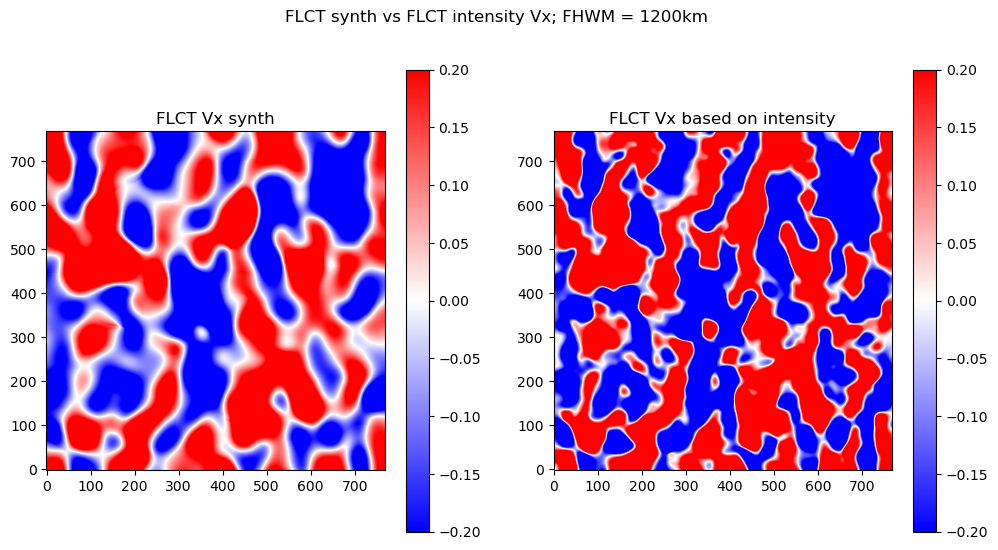

In [43]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vx; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_1200_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vx based on intensity") 
fig.colorbar(im2)

In [44]:
r_xFLCTvs = pearsonr(vel_x0.flatten(), Vx_1200_bin.flatten()) 
print(r_xFLCTvs)

PearsonRResult(statistic=0.8983964009619496, pvalue=0.0)


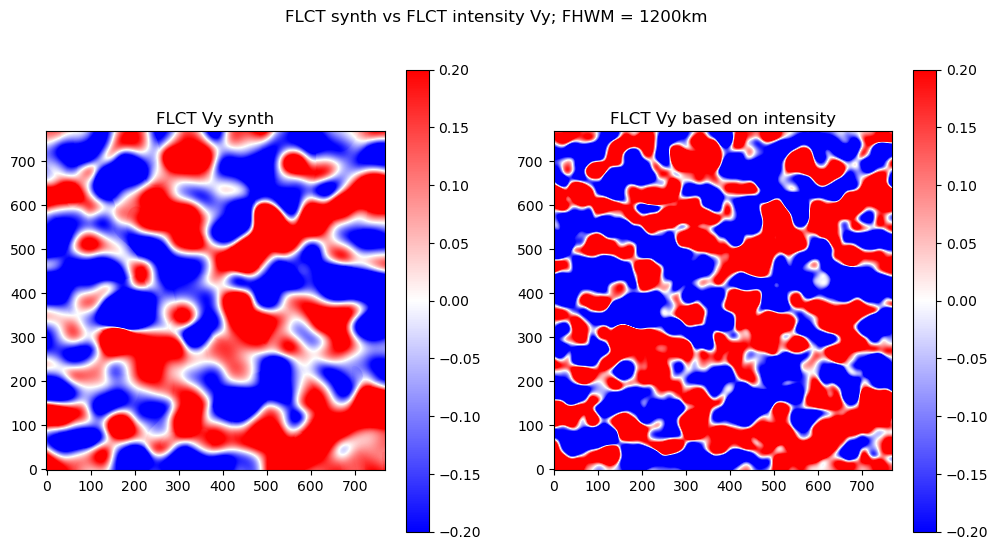

In [45]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vy; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_y0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vy synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vy_1200_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vy based on intensity") 
fig.colorbar(im2)

In [46]:
r_yFLCTvs = pearsonr(vel_y0.flatten(), Vy_1200_bin.flatten()) 
print(r_yFLCTvs)

PearsonRResult(statistic=0.882698662909349, pvalue=0.0)


<h2>Continuum (end)</h2>

In [47]:
image9 = cube1[:,:,0,80]
image10 = cube2[:,:,0,80]

In [48]:
vel_x80, vel_y80, vm80 = pyflct.flct(image9, image10, delta_t, pixelsize, sigma, quiet = True)

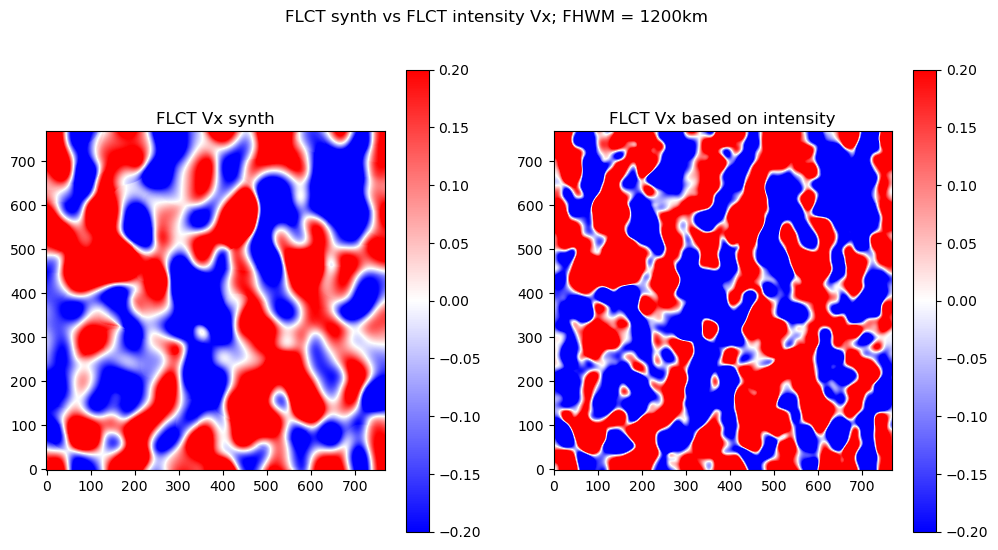

In [49]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vx; FHWM = 1200km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_x80[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_1200_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vx based on intensity") 
fig.colorbar(im2)

In [50]:
r_xFLCTvs80 = pearsonr(vel_x80.flatten(), Vx_1200_bin.flatten()) 
print(r_xFLCTvs80)

PearsonRResult(statistic=0.898813834772286, pvalue=0.0)


<h2>FWHM = 600 km</h2>

In [51]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 600.0 / 1.665 / pixelsize

In [52]:
vel_6x0, vel_6y0, vm60 = pyflct.flct(image9, image10, delta_t, pixelsize, sigma, quiet = True)

In [53]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [54]:
Vx_600_one = Vx_600[0]
Vx_600_two = Vx_600[1]

Vy_600_one = Vy_600[0]
Vy_600_two = Vy_600[1]

Vx_600_one = Vx_600_one.reshape(768, 2, 768, 2)
Vx_600_two = Vx_600_two.reshape(768, 2, 768, 2)
Vy_600_one = Vy_600_one.reshape(768, 2, 768, 2)
Vy_600_two = Vy_600_two.reshape(768, 2, 768, 2)

In [55]:
Vx_600_bin = (Vx_600_one + Vx_600_two).mean(axis = 3).mean(axis = 1)
Vy_600_bin = (Vy_600_one + Vy_600_two).mean(axis = 3).mean(axis = 1)

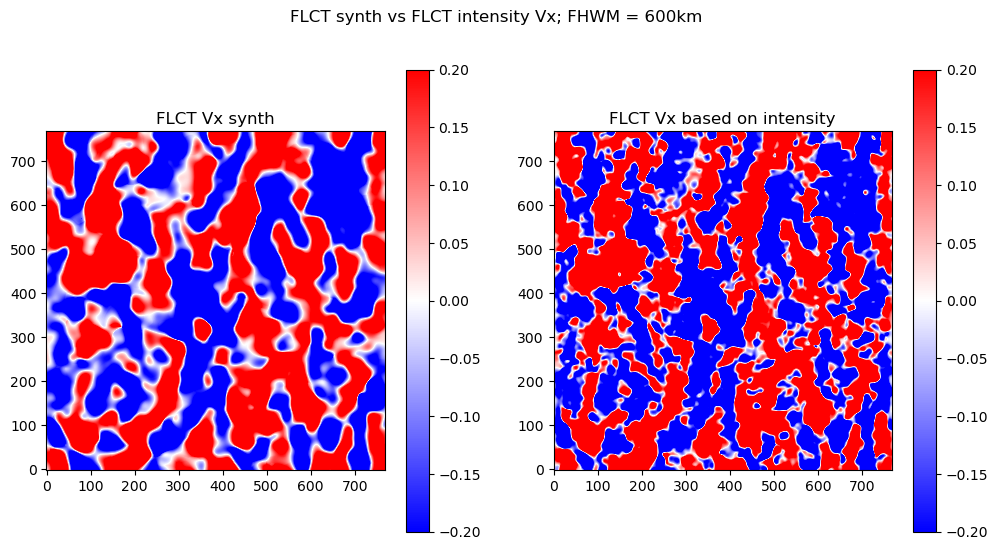

In [56]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vx; FHWM = 600km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_6x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_600_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vx based on intensity") 
fig.colorbar(im2)

In [57]:
r_xFLCTvs_600_0 = pearsonr(vel_6x0.flatten(), Vx_600_bin.flatten()) 
print(r_xFLCTvs_600_0)

PearsonRResult(statistic=0.9130587570231201, pvalue=0.0)


<h2>FWHM = 300 km</h2>

In [58]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 300.0 / 1.665 / pixelsize

In [59]:
vel_3x0, vel_3y0, vm30 = pyflct.flct(image9, image10, delta_t, pixelsize, sigma, quiet = True)

In [60]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [61]:
Vx_300_one = Vx_300[0]
Vx_300_two = Vx_300[3]

Vy_300_one = Vy_300[0]
Vy_300_two = Vy_300[3]

Vx_300_one = Vx_300_one.reshape(768, 2, 768, 2)
Vx_300_two = Vx_300_two.reshape(768, 2, 768, 2)
Vy_300_one = Vy_300_one.reshape(768, 2, 768, 2)
Vy_300_two = Vy_300_two.reshape(768, 2, 768, 2)

In [62]:
Vx_300_bin = (Vx_300_one + Vx_300_two).mean(axis = 3).mean(axis = 1)
Vy_300_bin = (Vy_300_one + Vy_300_two).mean(axis = 3).mean(axis = 1)

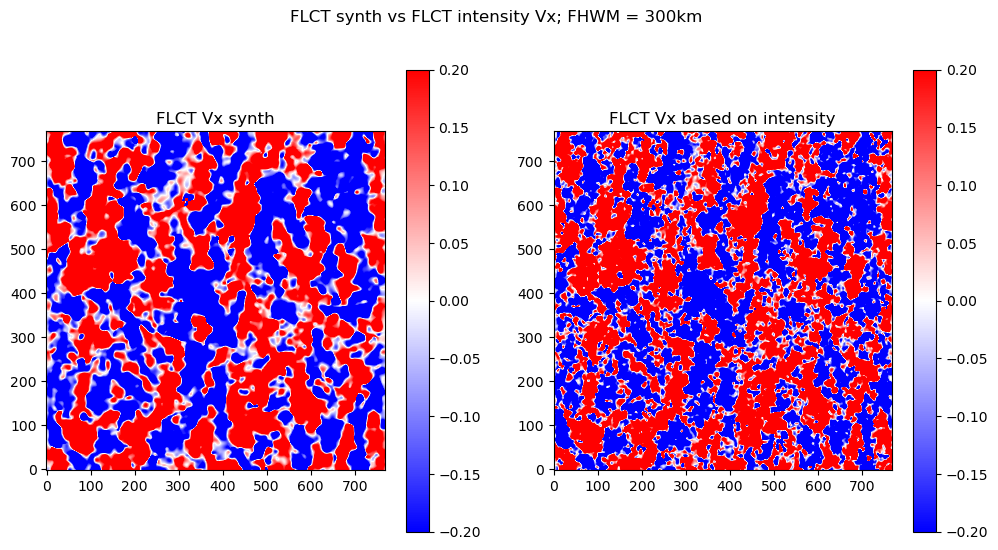

In [63]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vx; FHWM = 300km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_3x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_300_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vx based on intensity") 
fig.colorbar(im2)

In [64]:
r_xFLCTvs_300_0 = pearsonr(vel_3x0.flatten(), Vx_300_bin.flatten()) 
print(r_xFLCTvs_300_0)

PearsonRResult(statistic=0.859313600958684, pvalue=0.0)


<h1>FWHM = 100 km</h1>

In [65]:
delta_t = 10.0 * 3
pixelsize = 16.0
sigma = 100.0 / 1.665 / pixelsize

In [66]:
vel_1x0, vel_1y0, vm10 = pyflct.flct(image9, image10, delta_t, pixelsize, sigma, quiet = True)

In [67]:
Vx_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[0].data
Vy_100 = fits.open("pyFLCT_fwhm_100_dt_30_Inte_tracked.fits")[1].data

In [68]:
Vx_100_one = Vx_100[0]
Vx_100_two = Vx_100[3]

Vy_100_one = Vy_100[0]
Vy_100_two = Vy_100[3]

Vx_100_one = Vx_100_one.reshape(768, 2, 768, 2)
Vx_100_two = Vx_100_two.reshape(768, 2, 768, 2)
Vy_100_one = Vy_100_one.reshape(768, 2, 768, 2)
Vy_100_two = Vy_100_two.reshape(768, 2, 768, 2)

In [69]:
Vx_100_bin = (Vx_100_one + Vx_100_two).mean(axis = 3).mean(axis = 1)
Vy_100_bin = (Vy_100_one + Vy_100_two).mean(axis = 3).mean(axis = 1)

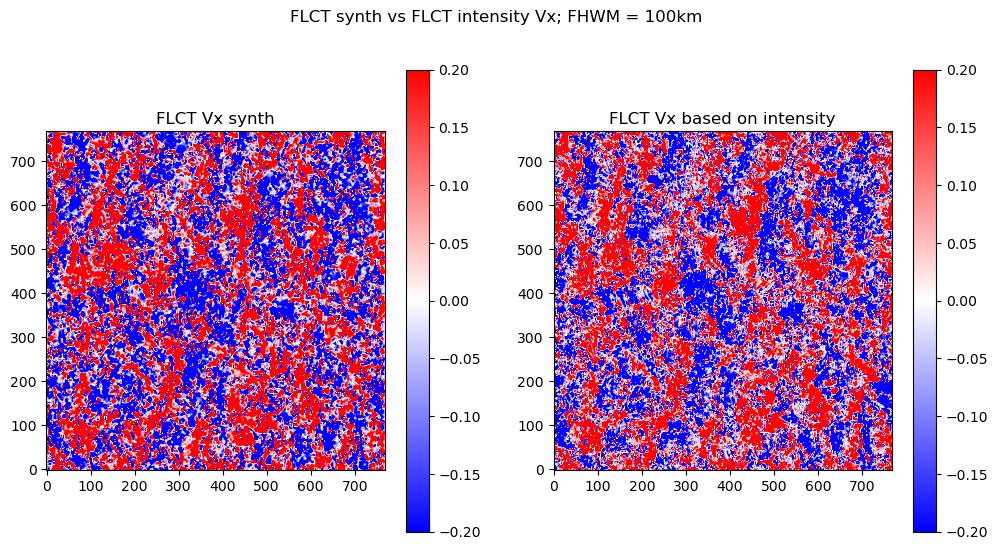

In [70]:
fig = plt.figure(figsize = (12,6))
fig.suptitle("FLCT synth vs FLCT intensity Vx; FHWM = 100km")
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(vel_1x0[:, :], origin='lower',cmap='bwr', vmin = -0.2, vmax = 0.2)
ax1.set_title("FLCT Vx synth") 
fig.colorbar(im1)

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(Vx_100_bin[:, :], origin='lower', cmap='bwr', vmin = -0.2, vmax = 0.2)
ax2.set_title("FLCT Vx based on intensity") 
fig.colorbar(im2)

In [71]:
r_xFLCTvs_100_0 = pearsonr(vel_1x0.flatten(), Vx_100_bin.flatten()) 
print(r_xFLCTvs_100_0)

PearsonRResult(statistic=0.2371759306218713, pvalue=0.0)


<h1>24. 7. 2024.</h1>

<h2>Matthias's simulation compared to synthetised spectra</h2>

In [72]:
synth = fits.open("0_lwsynth_525.0.fits")[0].data

In [73]:
matt = np.fromfile("I_out.000000", dtype = "float32")

In [74]:
matt.shape

(2359300,)

In [75]:
matt = matt[4:].reshape(1536, 1536)

In [76]:
matt.shape

(1536, 1536)

In [77]:
synth.shape

(768, 768, 1, 81)

In [78]:
matt = matt[::2, ::2]

In [79]:
matt.shape

(768, 768)

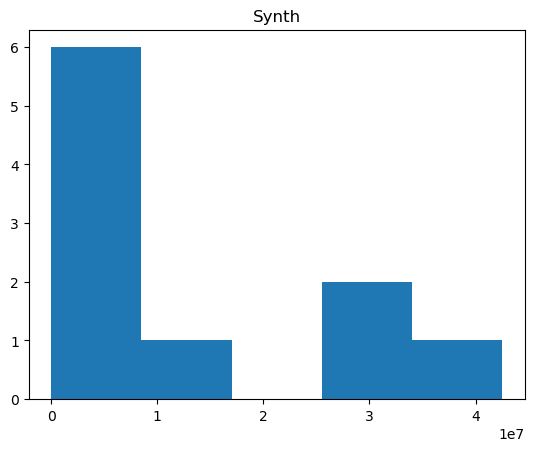

In [86]:
histogram_0, hedges = np.histogram(synth[:,:,0,0].flatten(), density = True)
plt.hist(histogram_0, bins = 'auto')
plt.title("Synth")
#plt.savefig("RealVxALL.png")
plt.show()

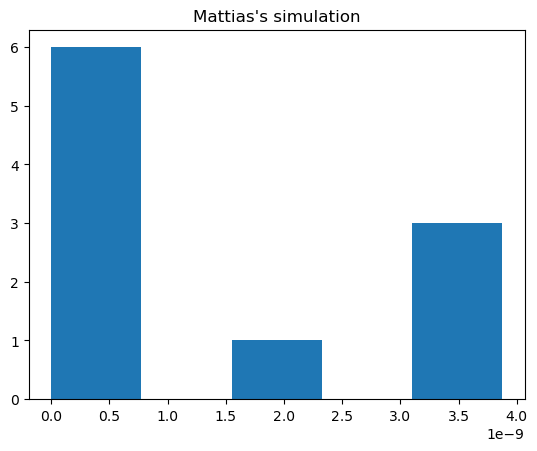

In [84]:
histogram_1, hedges = np.histogram(matt.flatten(), density = True)
plt.hist(histogram_1, bins = 'auto')
plt.title("Mattias's simulation")
#plt.savefig("RealVxALL.png")
plt.show()

In [89]:
inte_r = pearsonr(synth[:,:,0,0].flatten(), matt.flatten())
print(inte_r)

PearsonRResult(statistic=0.021341083575967423, pvalue=2.189238246167212e-60)


In [ ]:
# Normirati na intenzitet mirnog Sunca tako sto podelimo intenzitet sa intenzitetom mirnog Sunca
# na taj nacin ce vrednosti biti oko 1

<h1>14. 8. 2024.</h1>

In [71]:
synth = fits.open("0_lwsynth_525.0.fits")[0].data
synth_conv = fits.open("0_lwsynth_525.0_convolved.fits")[0].data

In [72]:
np.shape(synth)

(768, 768, 1, 81)

In [73]:
np.shape(synth_conv)

(768, 768, 1, 81)

In [74]:
np.std(synth)

1.3972819965594173e-08

In [75]:
synth_std = np.std(synth)
synth_mean = np.mean(synth)
RMS_1 = synth_std/synth_mean
print(RMS_1)

0.4483526717591238


In [76]:
synthconv_std = np.std(synth_conv)
synthconv_mean = np.mean(synth_conv)
RMS_2 = synthconv_std/synthconv_mean
print(RMS_2)

0.4276502746678291


In [79]:
lambda1 = synth[:,:,0,3]
lambda1_conv = synth_conv[:,:,0,3]

RMS_11 = np.std(lambda1)/np.mean(lambda1)
print("RMS for continuum: {}".format(RMS_11))

RMS_11conv = np.std(lambda1_conv)/np.mean(lambda1_conv)
print("RMS for continuum, convolved: {}".format(RMS_11conv))

RMS for continuum: 0.23478653876781272
RMS for continuum, convolved: 0.20840404217586028


In [80]:
lambda2 = synth[:,:,0,25]
lambda2_conv = synth_conv[:,:,0,25]

RMS_22 = np.std(lambda2)/np.mean(lambda2)
print("RMS for wing: {}".format(RMS_22))

RMS_22conv = np.std(lambda2_conv)/np.mean(lambda2_conv)
print("RMS for wing, convolved: {}".format(RMS_22conv))

RMS for wing: 0.24377535732926406
RMS for wing, convolved: 0.21675421065714254


In [81]:
lambda3 = synth[:,:,0,40]
lambda3_conv = synth_conv[:,:,0,40]

RMS_33 = np.std(lambda3)/np.mean(lambda3)
print("RMS for line center: {}".format(RMS_33))

RMS_33conv = np.std(lambda3_conv)/np.mean(lambda3_conv)
print("RMS for line center, convolved: {}".format(RMS_33conv))

RMS for line center: 0.5708152070611736
RMS for line center, convolved: 0.52462101153919


In [83]:
lambda4 = synth[:,:,0,63]
lambda4_conv = synth_conv[:,:,0,63]

RMS_44 = np.std(lambda4)/np.mean(lambda4)
print("RMS for wing: {}".format(RMS_44))

RMS_44conv = np.std(lambda2_conv)/np.mean(lambda4_conv)
print("RMS for wing, convolved: {}".format(RMS_44conv))

RMS for wing: 0.24443398962290713
RMS for wing, convolved: 0.23588410213269215


In [84]:
lambda5 = synth[:,:,0,78]
lambda5_conv = synth_conv[:,:,0,78]

RMS_55 = np.std(lambda5)/np.mean(lambda5)
print("RMS for continuum: {}".format(RMS_55))

RMS_55conv = np.std(lambda5_conv)/np.mean(lambda5_conv)
print("RMS for continuum, convolved: {}".format(RMS_55conv))

RMS for continuum: 0.23385709967756801
RMS for continuum, convolved: 0.20760166128290528
